# ***Model Evaluation***

In [11]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import learning_curve,LearningCurveDisplay
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

In [2]:
# load relevant dataset files
try:
    x_train = pd.read_csv('../data/x_train.csv')
    y_train = pd.read_csv('../data/y_train.csv')
    x_test = pd.read_csv('../data/x_test.csv')
    y_test = pd.read_csv('../data/y_test.csv')
except (FileNotFoundError,FileExistsError):
    print('File Not Found! Please check filepath and try again!')

In [3]:
# load models
try:
    xgb_model = joblib.load('../models/XGBRegressor_best_estimator.pkl')
    ridge_model = joblib.load('../models/Ridge_best_estimator.pkl')
    rf_model = joblib.load('../models/Random Forest_best_estimator.pkl')
    lasso_model = joblib.load('../models/Lasso_best_estimator.pkl')
except (FileNotFoundError,FileExistsError):
    print('File Not Found! Please check filepath and try again!')

*`Metrics Comparison`*

In [4]:
model_name = {
    'XGBRegressor' : xgb_model,
    'Ridge' : ridge_model,
    'Random Forest' : rf_model,
    'Lasso' : lasso_model
}

In [ ]:
def metrics_comparison(model,x_test):
    y_pred = model.predict(x_test)
    return y_pred

metric_results = {}
for name,model in model_name.items():
    y_pred = metrics_comparison(model,x_test)
    print('Model: ',name)
    print(f'RMSE score : ',root_mean_squared_error(y_test,y_pred))
    print(f'MAE : ',mean_absolute_error(y_pred,y_test))
    print('-'*50)

    metric_results[name] = {
        'RMSE Score' : root_mean_squared_error(y_pred,y_test),
        'MAE Score' : root_mean_squared_error(y_pred,y_test),
        'R^2 Score' : r2_score(y_pred,y_test)
    }

Model:  XGBRegressor
RMSE score :  26137.597657107533
MAE :  22675.974715333414
--------------------------------------------------
Model:  Ridge
RMSE score :  26146.654937895677
MAE :  22677.926856876253
--------------------------------------------------
Model:  Random Forest
RMSE score :  26137.597657107533
MAE :  22675.974715333414
--------------------------------------------------
Model:  Lasso
RMSE score :  26146.543626625044
MAE :  22678.00928750773
--------------------------------------------------
{'XGBRegressor': {'RMSE Score': 26137.597657107533, 'MAE Score': 26137.597657107533, 'R^2 Score': -6152.394010637105}, 'Ridge': {'RMSE Score': 26146.654937895677, 'MAE Score': 26146.654937895677, 'R^2 Score': -1111.9235826106028}, 'Random Forest': {'RMSE Score': 26137.597657107533, 'MAE Score': 26137.597657107533, 'R^2 Score': -6152.394010637105}, 'Lasso': {'RMSE Score': 26146.543626625044, 'MAE Score': 26146.543626625044, 'R^2 Score': -1149.5130163107676}}


*`Feature Importance`*

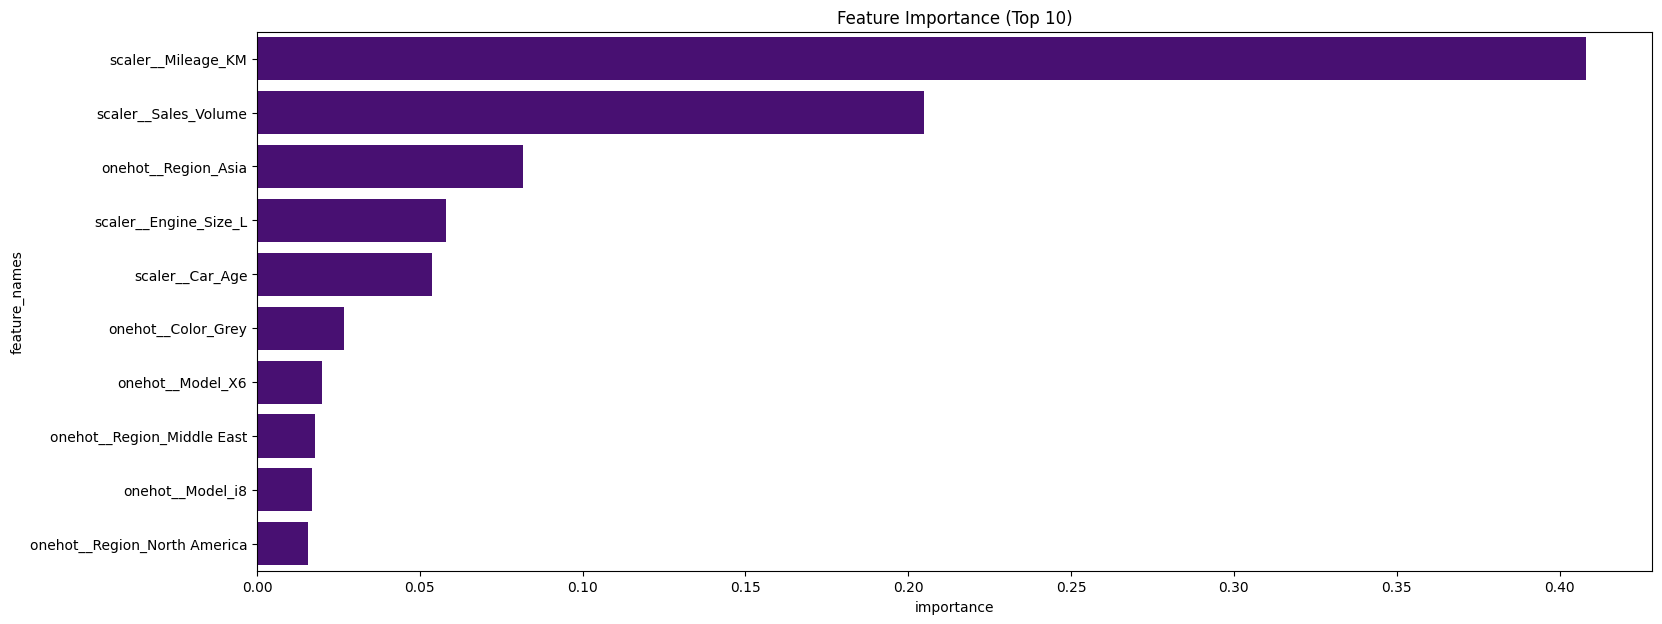

In [ ]:
best_model = xgb_model
feature_names = best_model.named_steps.get('preprocessor',None).get_feature_names_out()
importance = best_model.named_steps.get('model',None).feature_importances_

feature_importance = pd.DataFrame({
    'feature_names' : feature_names,
    'importance' : importance
}).sort_values(by='importance',ascending=False).head(10)
plt.figure(figsize=(18,7))
sns.barplot(data=feature_importance,x='importance',y='feature_names',color='indigo')
plt.title('Feature Importance (Top 10)')
plt.show()

# ***Model Performance Evaluation***